# Predicting success of your app idea

### Based on the data you input, there will be two predictions made: 
1. number of ratings, 
2. average rating

### Things to do:
* One hot encoding of categories
* Standardization of features
* Using F1 score
* Using KNN 
* Explore more of the features

### Setup 

In [59]:
import pandas as pd
import numpy as np

In [60]:
app_metrics = pd.read_csv('../data/AppleStore.csv')
app_description_data = pd.read_csv('../data/appleStore_description.csv')
pd.set_option('display.max_columns', None)

In [61]:
app_metrics.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [62]:
app_description_data.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


### Add app description into new column in metrics data frame

In [63]:
app_metrics['description'] = app_description_data['app_desc']
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


### Ensure price data is in the same currency 

In [64]:
app_metrics[app_metrics['currency'] != 'USD'].count()
# All price data is in USD  
# no need to do any currency conversions

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
description         0
dtype: int64

### Convert app size in bytes to mb (easier to work with)

In [65]:
app_metrics['size_mb'] = round(app_metrics['size_bytes'] / (1024*1024),1)
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5


## Predicting success based on genre

### Use one hot encoding with categorical values

#### Manual encoder

In [84]:
# One hot encoding for app genres
# Note: should create N -1 columns but not sure best way to do
def create_dummy_variables(dataframe, heading):
    unique_genres = dataframe[heading].unique()
    for x in unique_genres:
        dataframe[x] = np.where(dataframe[heading] == x, 1, 0)
    
create_dummy_variables(app_metrics, 'prime_genre')
print(unique_genres)

['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


#### Using sklearn encoder

In [67]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


### Create a category 'successful'
If an app has 300+ ratings (of any score), then we classify it as successful. There are roughly 50% each way.

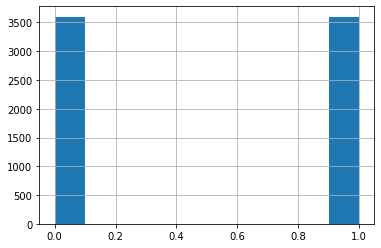

In [68]:
app_metrics['successful'] = np.where(app_metrics['rating_count_tot'] > 300, 1, 0)
success_of_categories = app_metrics['successful'].hist()

### Exploring how category affects success
* Only 15% of books were successful, whereas 65% of business apps were successful
* This shows that this feature should provide us with lot's of explanatory power. 

In [69]:
app_metrics.groupby('prime_genre').successful.mean().sort_values

<bound method Series.sort_values of prime_genre
Book                 0.151786
Business             0.649123
Catalogs             0.400000
Education            0.350993
Entertainment        0.484112
Finance              0.336538
Food & Drink         0.412698
Games                0.512688
Health & Fitness     0.572222
Lifestyle            0.437500
Medical              0.434783
Music                0.637681
Navigation           0.391304
News                 0.440000
Photo & Video        0.610315
Productivity         0.595506
Reference            0.546875
Shopping             0.573770
Social Networking    0.574850
Sports               0.438596
Travel               0.456790
Utilities            0.487903
Weather              0.513889
Name: successful, dtype: float64>

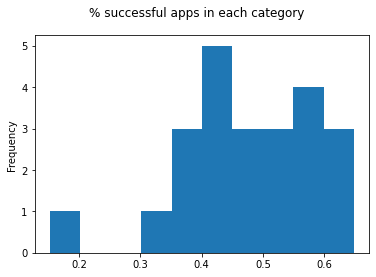

In [70]:
ax = app_metrics.groupby('prime_genre').successful.mean().plot(kind='hist',subplots=True,sharex=True,sharey=True,title='% successful apps in each category')

### Logistic Regression initial test with categories
Makes accurate predictions 55% of the time.

In [71]:
# import libraries ready for classification based on category
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

unique_genres = app_metrics['prime_genre'].unique()

X = app_metrics[unique_genres]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)

0.5534511784511784

### Predicting success with app file size using logistic regression
49% accurate

In [72]:
X = app_metrics[['size_mb']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)

0.4903198653198653

### Creating new features: Length of title and length of description
Not very helpful when evaluating an idea, but could be helpful in understanding what drives success.

In [73]:
# Create new features: length of title and length of description
app_metrics['length_of_title'] = app_metrics['track_name'].str.len()
app_metrics['length_of_description'] = app_metrics['description'].str.len()
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,Travel,Social Networking,Sports,Business,Health & Fitness,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs,successful,length_of_title,length_of_description
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,1533
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,3952
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,47,2090
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,3997
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,2998


### Predicting success with length of title and length of description using logistic regression. 
Accurate predicitons 63% of times on test set, 
most of explanatory power came from length of title

In [74]:
X = app_metrics[['length_of_title', 'length_of_description']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# The model achieves a score of 0.63, very helpful in predicting success. 
# Length of description alone was 0.63
# array([[-0.010165  ,  0.00055651]])
# We can see that the length fo the title is really important. 
# Longer titles do worse
# Length of description was not very explanatory
app_success_model.coef_

array([[-0.010165  ,  0.00055651]])

### Comparing success of free apps vs paid apps

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120f6d590>],
      dtype=object)

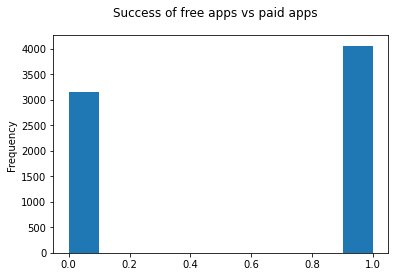

In [75]:
# Create some new features 
app_metrics['app_is_free'] = np.where(app_metrics['price'] == 0,1,0)
# app_metrics['app_is_free'].hist()
app_metrics['app_is_free'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Success of free apps vs paid apps')

### Predicting success based on free vs paid using logistic regression
Accurate predictions 54% of the time

In [76]:
# Test the explainability of free apps

X = app_metrics[['app_is_free']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# 54% correct, better than 50%. Could be useful addition to model

0.5484006734006734

### Predicting success with category, free vs paid, length of title, length of description using logistic regression
Accurate predictions 66% of the time

In [77]:
selected_features = ['Games', 'Productivity', 'Weather', 'Shopping', 'Reference', 'Finance', 'Music',
 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
 'Health & Fitness', 'Entertainment', 'Photo & Video', 'Navigation',
 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Book', 'Medical','Catalogs','length_of_title', 'length_of_description', 'app_is_free']

X = app_metrics[selected_features]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression(max_iter=4000)
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)

# Successful predictions 66% of the time. 
# app_success_model.predict([])
X_train.head()
example = [[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50,499,0]]
print(app_success_model.predict(example))
app_success_model.score(X_test,y_test)
app_success_model.coef_

[0]


array([[ 2.63057547e-01,  1.61484557e-01, -1.49629045e-01,
         2.85991698e-01,  9.36188941e-02, -5.23908399e-01,
         9.33499401e-02,  2.56433341e-01, -3.47607188e-01,
         4.73498760e-01, -1.90879637e-01,  1.80275025e-01,
        -4.00962627e-02,  2.84730253e-01,  6.85204666e-01,
        -3.20728641e-01, -8.49983487e-01, -5.38383925e-02,
        -3.34521405e-01,  2.44458428e-02, -1.05540455e+00,
        -1.63746260e-01, -6.09261919e-02, -1.01811849e-02,
         6.96769045e-04,  6.93287229e-01]])

In [78]:
# Next steps:
# Use NLP with the app description to predict success (gensim, word2vec, bag of words)
# Grid search with logistic regression 
# Train/Validation/Test
# Predict rating score with classification
# Predict genre from description

### LinearSVC

In [79]:
from sklearn.svm import LinearSVC

### Predicting success with category, free vs paid, length of title using linear SVC
Accurate predictions 56% of the time

In [80]:
# Same features as before, minus lengh of description
selected_features = ['Games', 'Productivity', 'Weather', 'Shopping', 'Reference', 'Finance', 'Music',
 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
 'Health & Fitness', 'Entertainment', 'Photo & Video', 'Navigation',
 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Book', 'Medical','Catalogs','length_of_title', 'app_is_free']

X = app_metrics[selected_features]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LinearSVC(max_iter=10000)
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# app_success_model.coef_

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5660774410774411

### Using GridSearchCV to find best hyperparameters for linearSVC
* 8 experiments (2 x 4 hyper param options), 5 folds for each. 80% of the data on each fold. 

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_search = GridSearchCV(app_success_model, {'loss':['hinge','squared_hinge'],'C':[0.5,1.0,1.5,2.0] } )

In [25]:
grid_search.fit(X_train, y_train)
y_predicted = grid_search.predict(X_test)
grid_search.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.5601851851851852

### Accuracy score for linearSVC after grid search: 56% 
* This is the best score from LinearSVC from tuning the hyperparameters uding grid search

###  Predicting success with category, free vs paid, length of title using Random Forest
* Forest of multiple decision trees. 
* Each subset of data - overfit specific part of data. 
* In order to predict, use all of the trees and aggregate odds. 
* Removes the overfitting. Cancel each other out
* 150 decision trees, 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
random_forest_model = RandomForestClassifier(random_state=42)
grid_search_random_forest = GridSearchCV(random_forest_model, {'n_estimators':[50, 100, 150], 'max_depth':[None, 5, 10, 20,30,40,50]})
grid_search_random_forest.fit(X_train, y_train)
grid_search_random_forest.predict(X_test)
grid_search_random_forest.score(X_test, y_test)

0.5694444444444444

### Accuracy score for Random Forest predictions of app success: 58%

In [83]:
grid_search_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Analysis - Random Forest was overfitting

In [29]:
grid_search_random_forest.score(X_train, y_train)
# 66% - very high overfitting.
# grid_search_random_forest.cv_results_

0.5984235635760216

In [85]:
X = app_metrics[['length_of_title', 'length_of_description']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
app_success_model = LogisticRegression()
X_train


,length_of_title,length_of_description
4556,35,1167
6421,14,1256
2445,24,1538
4988,10,85
570,19,1849
...,...,...
3772,16,417
5191,16,245
5226,12,382
5390,40,1723


### Using standardScaler to standardize length of title, length of description to use with logistic Regression
Accuracy score of 63%, unchanged as expected because logistic regression fits a straight line no matter what the scale.

#### We fit our scaler with X_train and we scale X_train, then we use this scaler to scale X_test (so that mean and std dev. of X_train is not impacted by X_test - this helps avoid leakage of data from the test set to training set, which in turn helps avoid overfitting)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_train

array([[ 0.54081532, -0.37840273],
       [-0.66492535, -0.28988405],
       [-0.09076313, -0.00940912],
       ...,
       [-0.7797578 , -1.15915741],
       [ 0.82789644,  0.17459039],
       [-0.37784424,  0.4709788 ]])

In [87]:
app_success_model.fit(scaled_X_train, y_train)
scaled_X_test = scaler.transform(X_test)
y_predicted = app_success_model.predict(scaled_X_test)

app_success_model.score(scaled_X_test,y_test)

0.6300505050505051

### Grid SearchCV with LinearSVC with pipeline for standardization

In [89]:
from sklearn.pipeline import Pipeline
# anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
pipeline = Pipeline([('scaler', StandardScaler()),('svc', LinearSVC(max_iter=10000))])

#### We pass in our pipeline to gridsearchCV, we use svc__ to tell the grid search that this is the loss of the svc rather than the scaler
We would only have one model in the pipeline, but potentially many preprocessing steps. 

In [90]:
# app_success_model = LinearSVC(max_iter=10000)
# app_success_model.fit(X_train, y_train)

grid_search = GridSearchCV(pipeline, {'svc__loss':['hinge','squared_hinge'],'svc__C':[0.5,1.0,1.5,2.0] } )

In [92]:
grid_search.fit(X_train, y_train)
y_predicted = grid_search.predict(X_test)
grid_search.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.627104377104377